# Linear Regression  on a Combined Cycle Power Plant (CCPP) data
## Dataset description

The dataset contains 5281 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE)  of the plant.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum has effect on the Steam Turbine, the other three of the ambient variables effect the GT performance.

In [23]:
#to get in-line plots
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd

## Import Data
Load the data from a .csv file and print data column names.

**TO DO:** insert your ID number (matricola)


In [24]:
#Load the data

IDnumber = 2082157
np.random.seed(IDnumber)

filename = "ccpp_Data_clean2019.csv"

df = pd.read_csv(filename,sep=";")

col_names = df.columns
print(col_names)

#get the data
data = df.values

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


# A quick overview of data

To inspect the data you can use the method describe().

In [25]:
data_description = stats.describe(data)
print(data_description)
print(data.shape)

#for more interesting data visualization, use pandas!
df.describe()

DescribeResult(nobs=5281, minmax=(array([  1.81,  25.36, 992.89,  25.56, 420.26]), array([  37.11,   81.56, 1033.29,  100.16,  495.23])), mean=array([  19.67317553,   54.31940163, 1013.22432115,   73.38815187,
        454.31701004]), variance=array([ 56.0327041 , 161.7733201 ,  35.2083789 , 217.43618617,
       291.84459771]), skewness=array([-0.13713412,  0.19522075,  0.24934713, -0.43467097,  0.29846615]), kurtosis=array([-1.04662553, -1.45165813,  0.01128758, -0.43044229, -1.05785395]))
(5281, 5)


,AT,V,AP,RH,PE
count,5281.000000,5281.000000,5281.000000,5281.000000,5281.00000
mean,19.673176,54.319402,1013.224321,73.388152,454.31701
std,7.485500,12.719014,5.933665,14.745718,17.08346
min,1.810000,25.360000,992.890000,25.560000,420.26000
25%,13.480000,41.700000,1009.030000,63.320000,439.61000
50%,20.320000,52.360000,1012.950000,75.070000,451.86000
75%,25.770000,66.540000,1017.320000,84.940000,468.30000
max,37.110000,81.560000,1033.290000,100.160000,495.23000


# Split data in training, validation and test sets



Given $m$ total data, keep $m_t$ data as training data, $m_{val}:=m_{tv}-m_t$ as validation data and $m_{test}:=m - m_{val} - m_t = m-m_{tv}$ for test data. For instance one can take $m_t=m/3$ of the data as training, $m_{val}=m/3$  validation and $m_{test}=m/3$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{val}$ the validation data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the training loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat h = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

VALIDATION DATA: Validation data are used when different model classes are present (e.g. of different complexity such as linear regression which used a different number $d_j$ of features $x_1$,...$x_{d_j}$ in the model). In general, with more features one can better fit the training set, so one has to choose which one is the "best" complexity. Let ${\cal H}_{d_j}$ be the space of models as a function of the complexity $d_j$ and let 
$$
\hat h_{d_j} = {\rm arg\; min}_{h \in {\cal H}_{d_j}} \, L_S(h)
$$

One can estimate the generalization error for model $\hat h_{d_j}$ as follows:
$$
L_{{\cal D}}(\hat h_{d_j}) \simeq \frac{1}{m_{val}} \sum_{ z_i \in S_{val}} \ell(\hat h_{d_j},z_i)
$$
and then choose the complexity which achieves the best estimate of the generalization error
$$
\hat d: = {\rm arg\; min}_{d_j} \,\frac{1}{m_{val}} \sum_{ z_i \in S_{val}} \ell(\hat h_{d_j},z_i)
$$

TESTING DATA: Last, the test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training, validation and test sets (suggestion: use $m_t=m_{val} = \lfloor\frac{m}{3}\rfloor$, $m_{test} = m-m_t-m_{val}$)

In [26]:
#get number of total samples
num_total_samples = data.shape[0]

print("Total number of samples: "+str(num_total_samples))

#copy the set of labels from data (last column)
labels_set = data[:,-1]

#size of each chunk of data for training, validation, testing
size_chunk = int(num_total_samples/3.)

print("Size of each chunk of data: "+str(size_chunk))

#shuffle the data
np.random.shuffle(data)

#training data
#validation data to be used to choose among different models
#test data to be used to estimate the true loss of the final model(s)

#in this case, I use the sklearn function train_test_split to split the data into training, validation and test
from sklearn.model_selection import train_test_split

X_training, X_tmp, Y_training, Y_tmp = train_test_split(data[:,0:4], labels_set, train_size=size_chunk, shuffle=False)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_tmp, Y_tmp, train_size=size_chunk, shuffle=False)

print("Training data input size: "+str(X_training.shape))
print("Training data output size: "+str(Y_training.shape))

print("Validation data input size: "+str(X_validation.shape))
print("Validation data ouput size: "+str(Y_validation.shape))

print("Test data input size: "+str(X_test.shape))
print("Test data output size: "+str(Y_test.shape))

Total number of samples: 5281
Size of each chunk of data: 1760
Training data input size: (1760, 4)
Training data output size: (1760,)
Validation data input size: (1760, 4)
Validation data ouput size: (1760,)
Test data input size: (1761, 4)
Test data output size: (1761,)


# Data Normalization

It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to $1$. This helps in terms of numerical stability (conditioning) of the (inverse) problems of estimating the ERM model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients. 

In [27]:
#standardize the input matrix
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_training)

X_training = scaler.transform(X_training)
print("Mean of the training input data: "+str(X_training.mean(axis=0)))
print("Std of the training input data: "+str(X_training.std(axis=0)))

X_validation = scaler.transform(X_validation) #use the same transformation on validation data
print("Mean of the validation input data: "+str(X_validation.mean(axis=0)))
print("Std of the validation input data: "+str(X_validation.std(axis=0)))

X_test = scaler.transform(X_test) #use the same transformation on test data
print("Mean of the test input data: "+str(X_test.mean(axis=0)))
print("Std of the test input data: "+str(X_test.std(axis=0)))

Mean of the training input data: [ 3.76075433e-15 -5.97670587e-15 -7.01866595e-14  6.21977217e-16]
Std of the training input data: [1. 1. 1. 1.]
Mean of the validation input data: [-0.02227368 -0.00807951 -0.00535423  0.03418863]
Std of the validation input data: [0.98341008 0.99560407 1.02450058 0.99651856]
Mean of the test input data: [ 0.01654846  0.01521393 -0.031105    0.0243474 ]
Std of the test input data: [0.97275367 0.98171915 0.98838605 1.00866861]


# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
where $z_i = (x_i,y_i)$.
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recall that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t}(y - Xw)^T(y-Xw) =  \frac{1}{m_t} \|y - X w\|^2
$$
where $y$ is the vector whose $i-th$ element is the output datum $y_i$ and $X$ is the matrix whose $i-$th row is the input vector $x_i^\top$.

The least squares solution is given by the expression
$$
\hat w = {\rm arg\;min}_w L_S(w) = (X^\top X)^{-1} X^\top Y
$$
When the matrix $X$ is not invertible, the solution can be computed using the Moore-Penrose pseudonverse $(X^\top X)^{\dagger}$ of $(X^\top X)$
$$
\hat w = (X^\top X)^{\dagger} X^\top Y
$$


 In practice some of the singular values may be very small (e.g. $<1e-12$). Therefore it makes sense to 
 first approximate the matrix $A$ truncating the SVD and then using the pseudoinverse formula.
 
 More specifically, let us postulate that, given a threshold $T_h$ (e.g $=1e-12$), we have $\sigma_i<T_h$, for $i=\hat r + 1,..,r$. Then we can approximate (by SVD truncation) $A$ using:
 
 $$A = USV^\top =U \,{\rm diag}\{s_1,s_2,..,s_r\}\, V^\top \simeq \hat A_r = U\,{\rm diag}\{s_1,s_2,..,s_{\hat r}, 0,..,0\}\,V^\top
 $$
 So that 
 $$
 A^\dagger \simeq \hat A_r^\dagger:= V \,{\rm diag}\{1/s_1,1/s_2,..,1/s_{\hat r}, 0,..,0\}\, U^\top
 $$
 
 The linear regression coefficients can be computed directly using the numyp.linalg.lstsq function
  
 **TO DO**: compute the linear regression coefficients using the numpy.linalg.lstsq function

In [28]:
#compute linear regression coefficients for training data

#add a 1 at the beginning of each sample for training, validation and testing
m_training = X_training.shape[0]
X_training = np.hstack((np.ones((m_training,1)),X_training))

m_validation = X_validation.shape[0]
X_validation = np.hstack((np.ones((m_validation,1)),X_validation))

m_test = X_test.shape[0]
X_test = np.hstack((np.ones((m_test,1)),X_test))

#[useless] check if there is the correct amount of training, validation and test data
if m_training == int(np.floor(num_total_samples/3.)) & m_validation == int(np.floor(num_total_samples/3.)) & m_test == num_total_samples - m_training - m_test:
    print("Yes, the amount of training, validation and test data is correct!")

#compute the coefficients for linear regression (LR) using linalg.lstsq
w_np, RSS_tr_np, rank_X_tr, sv_X_tr = np.linalg.lstsq(X_training, Y_training, rcond=None)
print("LR coefficients with numpy lstsq: "+ str(w_np))

#compute Residual Sums of Squares by hand
print("RSS with numpy lstsq: "+str(RSS_tr_np))
print("Empirical risk with numpy lstsq: "+str(RSS_tr_np/m_training))


Yes, the amount of training, validation and test data is correct!
LR coefficients with numpy lstsq: [ 4.54668761e+02 -1.49019039e+01 -3.07736445e+00  3.78586307e-01
 -2.36375252e+00]
RSS with numpy lstsq: [35449.22360995]
Empirical risk with numpy lstsq: [20.14160432]


## Data prediction 

Compute the output predictions on both training and validation set and compute the Residual Sum of Sqaures (RSS) defined above, and the Emprical Loss. Compute also the quantity $R^2$ where
$$
R^2 = 1 - \frac{\sum_{z_i \in S_t} (\hat y_i - y_i)^2}{\sum_{z_i \in S_t} (y_i - \bar y)^2} \quad \quad \bar y = \frac{1}{m_t} \sum_{z_i \in S_t} y_i
$$
is the so-called "Coefficient of determination" (COD)

**TO DO**: Compute these quantities on training, validation and test sets.

In [29]:
#compute predictions on training set, validation set and test set
#computation of predictions: h(w_np) = Xw_np, as I am considering the bias with the ones added previously in X
prediction_training = np.dot(X_training, w_np)
prediction_validation = np.dot(X_validation, w_np)
prediction_test = np.dot(X_test, w_np)

#what about the RSS and loss for points in the validation data?
#for the RSS computation, I use the following formula: RSS = (y - Xw).T (y - Xw)
#or equivalently: RSS = np.sum(np.square(Y - predictions))
#clearly, np.dot(X, w_np) = predictions computed above
RSS_training = np.dot(np.transpose(Y_training - prediction_training), (Y_training - prediction_training))
#RSS_training should be equal to RSS_tr_np (they are equal considering an approximation)
RSS_validation = np.dot(np.transpose(Y_validation - prediction_validation), (Y_validation - prediction_validation))
RSS_test = np.dot(np.transpose(Y_test - prediction_test), (Y_test - prediction_test))

print("RSS on training data: "+str(RSS_training))
print("Loss estimated from training data: "+str(RSS_training/m_training))

print("RSS on validation data: "+str(RSS_validation))
print("Loss estimated from validation data: "+str(RSS_validation/m_validation))

print("RSS on test data: "+str(RSS_test))
print("Loss estimated from test data: "+str(RSS_test/m_test))

#another measure of how good our linear fit is given by the following (that is 1 - R^2)
#compute R^2 for training, validation and test set
                               
#firstly, I compute the error related to the naive predictor
#avg_predictor is the signed(y) computation
avg_predictor_training = np.sum(Y_training)/m_training
naive_predictor_training = np.sum(np.square(Y_training - avg_predictor_training))

avg_predictor_validation = np.sum(Y_validation)/m_validation
naive_predictor_validation = np.sum(np.square(Y_validation - avg_predictor_validation))

avg_predictor_test = np.sum(Y_test)/m_test
naive_predictor_test = np.sum(np.square(Y_test - avg_predictor_test))

#then, I use the previous computation to calculate R^2 and consequently 1-R^2
R_squared_training = 1. - (np.sum(np.square(prediction_training - Y_training))/naive_predictor_training)
R_measure_training = 1 - R_squared_training

R_squared_validation = 1. - (np.sum(np.square(prediction_validation - Y_validation)))/naive_predictor_validation
R_measure_validation = 1 - R_squared_validation

R_squared_test = 1. - (np.sum(np.square(prediction_test - Y_test)))/naive_predictor_test
R_measure_test = 1 - R_squared_test

print("Measure on Training Data (1-R^2): "+str(R_measure_training))
print("Measure on Validation Data (1-R^2): "+str(R_measure_validation))
print("Measure on Test Data (1-R^2): "+str(R_measure_test))

RSS on training data: 35449.22360995376
Loss estimated from training data: 20.141604323837363
RSS on validation data: 39838.60908970955
Loss estimated from validation data: 22.63557334642588
RSS on test data: 35694.82788177914
Loss estimated from test data: 20.269635367279466
Measure on Training Data (1-R^2): 0.06761780056738653
Measure on Validation Data (1-R^2): 0.0790216167940313
Measure on Test Data (1-R^2): 0.06973902882388816


## ... and plot:


### (1) output predictions on training  data

Note that in the following plot and in the analogous plots below the data is permuted so that the predictions are increasing with the index of the instance in the plot. **This is just to make the plot look nice!**

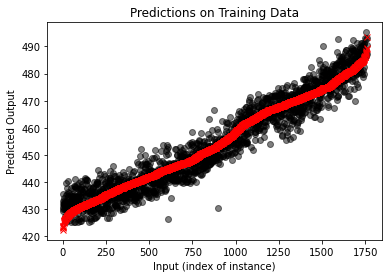

In [30]:
#plot predictions on training data 
plt.figure()

#the following is just for nice plotting, not required: it sorts the predictions by value so that they fall on
#a line and it's easier to spot the differences
sorting_permutation = sorted(range(len(prediction_training[0:m_training])), key=lambda k: prediction_training[0:m_training][k])
plt.plot(Y_training[sorting_permutation], 'ko', alpha=0.5)
plt.plot(prediction_training[sorting_permutation], 'rx')

plt.xlabel('Input (index of instance)')
plt.ylabel('Predicted Output')
plt.title('Predictions on Training Data')
plt.show()

### (2) output predictions on validation  data

Plot predictions on validation data.

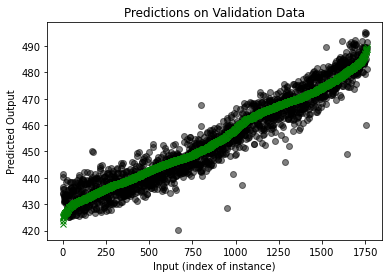

In [31]:
#plot predictions on validation data 
plt.figure()

#the following is just for nice plotting, not required: it sorts the predictions by value so that they fall on
#a line and it's easier to spot the differences
sorting_permutation = sorted(range(len(prediction_validation[0:m_validation])), key=lambda k: prediction_validation[0:m_validation][k])
plt.plot(Y_validation[sorting_permutation], 'ko', alpha=0.5)
plt.plot(prediction_validation[sorting_permutation], 'gx')


plt.xlabel('Input (index of instance)')
plt.ylabel('Predicted Output')
plt.title('Predictions on Validation Data')
plt.show()

# Removing some features

Perform same as above removing 1 feature that you think may not be as important as the other ones for prediction; recall that, since the data has been normalized, may be done by looking at the weights of each feature in the learned model.

**TO DO**: repeat the learning procedure after having removed 1 feature that you considered less important and explain the choice of which regressors to be removed.

**ANSWER [David Polzoni]**: As a feature to remove, I choose the one with the least contribution in terms of absolute value (in this case $w_{np}[3]$). As a consequence, I'm going to delete the third column of $X_{training}$, $X_{validation}$ and $X_{test}$.

In [32]:
#reduced design matrix

selected_features = w_np[3]
X_training_reduced = X_training[:,[0, 1, 2, 4]]
X_validation_reduced = X_validation[:,[0, 1, 2, 4]]
X_test_reduced = X_test[:,[0, 1, 2, 4]]

w_np_reduced, RSS_tr_np_reduced, rank_Xtr_reduced, sv_Xtr_reduced = np.linalg.lstsq(X_training_reduced, Y_training, rcond=None)

print("LR coefficients of reduced model: "+str(w_np_reduced))

#compute predictions (same approach specified before)
prediction_training_reduced = np.dot(X_training_reduced, w_np_reduced)
prediction_validation_reduced = np.dot(X_validation_reduced, w_np_reduced)
prediction_test_reduced = np.dot(X_test_reduced, w_np_reduced)

#compute training error: RSS_training_reduced/m_training
RSS_training_reduced = np.dot(np.transpose(Y_training - prediction_training_reduced), (Y_training - prediction_training_reduced))
#RSS_training_reduced should be equal to RSS_tr_np_reduced (they are equal considering an approximation)
training_error_reduced = RSS_training_reduced/m_training
print("RSS on training data of reduced model: "+str(RSS_training_reduced))
print("Loss estimated from training data of reduced model: "+str(training_error_reduced))

#compute validation error: RSS_validation_reduced/m_validation
RSS_validation_reduced = np.dot(np.transpose(Y_validation - prediction_validation_reduced), (Y_validation - prediction_validation_reduced))
validation_error_reduced = RSS_validation_reduced/m_validation
print("RSS on validation data of reduced model: "+str(RSS_validation_reduced))
print("Loss estimated from validation data of reduced model: "+str(validation_error_reduced))

#compute test error: RSS_test_reduced/m_test
RSS_test_reduced = np.dot(np.transpose(Y_test - prediction_test_reduced), (Y_test - prediction_test_reduced))
test_error_reduced = RSS_test_reduced/m_test
print("RSS on test data of reduced model: "+str(RSS_test_reduced))
print("Loss estimated from test data of reduced model: "+str(test_error_reduced))

#another measure of how good our linear fit is given by the following (that is 1 - R^2)
#compute training, validation and test error as 1-R^2 (same approach specified before)
#naive_predictor is the same!
R_squared_training_reduced = 1. - np.sum(np.square(prediction_training_reduced - Y_training))/naive_predictor_training
R_measure_training_reduced = 1. - R_squared_training_reduced
print("Measure on training data of reduced model: "+str(R_measure_training_reduced))

R_squared_validation_reduced = 1. - np.sum(np.square(prediction_validation_reduced - Y_validation))/naive_predictor_validation
R_measure_validation_reduced = 1. - R_squared_validation_reduced
print("Measure on validation data of reduced model: "+str(R_measure_validation_reduced))

R_squared_test_reduced = 1. - np.sum(np.square(prediction_test_reduced - Y_test))/naive_predictor_test
R_measure_test_reduced = 1. - R_squared_test_reduced
print("Measure on test data of reduced model: "+str(R_measure_test_reduced))


LR coefficients of reduced model: [454.66876136 -15.23055569  -3.00139866  -2.48008057]
RSS on training data of reduced model: 35616.621428078244
Loss estimated from training data of reduced model: 20.236716720499004
RSS on validation data of reduced model: 39879.36275561719
Loss estimated from validation data of reduced model: 22.65872883841886
RSS on test data of reduced model: 35901.62084456785
Loss estimated from test data of reduced model: 20.387064647681914
Measure on training data of reduced model: 0.06793710438080425
Measure on validation data of reduced model: 0.0791024534658904
Measure on test data of reduced model: 0.07014305207454685


## Plot prediction on validation data for the reduced model

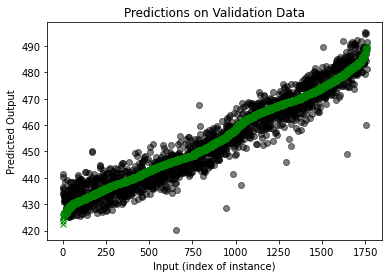

In [33]:
plt.figure()

#the following is just for nice plotting, not required: it sorts the predictions by value so that they fall on
#a line and it's easier to spot the differences
sorting_permutation = sorted(range(len(prediction_validation_reduced[0:m_validation])), key=lambda k: prediction_validation_reduced[0:m_validation][k])
plt.plot(Y_validation[sorting_permutation], 'ko', alpha=0.5)
plt.plot(prediction_validation_reduced[sorting_permutation], 'gx')


plt.xlabel('Input (index of instance)')
plt.ylabel('Predicted Output')
plt.title('Predictions on Validation Data')
plt.show()

# MODEL SELECTION 

**TO DO**: Based on the results of the estimated models (full model and reduced model) **on the validation data** which one would you choose? Explain the choice. Is this choice supported by the predictions of the estimated models **on the test data**? Explain your reasoning.

**ANSWER [David Polzoni]**: As can be seen by the computation listed below, it's preferrable to choose the **reduced model** since it has very similar performances (in terms of $1 - R^{2}$) w.r.t. the full model. The obtained gain is the deletion of a feature which simplify the model. As can be seen from the figures below, in terms of predictions on validation data and test data, we have the same performances overall. As a consequence, the choice of the reduced model it's justified by these considerations.

Model selected (based on 1-R^2): reduced!


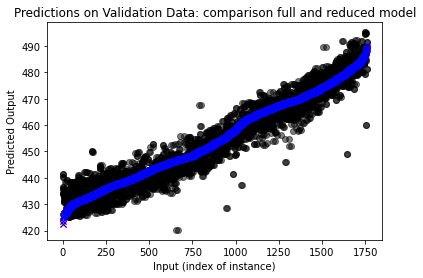

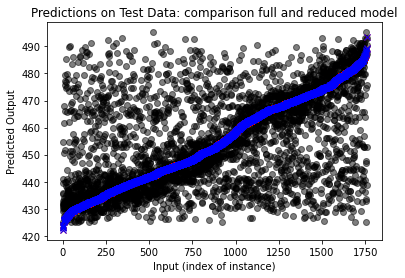

In [34]:
#compare the estimated models on 1-R^2 (validation data)
epsilon = 1.0e-04 #bound to verify the performances similarity: difference is about 1.0e-04
if R_measure_validation_reduced < R_measure_validation + epsilon:
    print("Model selected (based on 1-R^2): reduced!")
elif R_measure_validation_reduced == R_measure_validation + epsilon:
    print("Same performances on validation data (1-R^2)!")
else:
    print("Model selected (based on 1-R^2): full!")

#graphical comparison between predictions on validation data (same results!)
plt.figure()

#the following is just for nice plotting, not required: it sorts the predictions by value so that they fall on
#a line and it's easier to spot the differences
sorting_permutation_full = sorted(range(len(prediction_validation[0:m_validation])), key=lambda k: prediction_validation[0:m_validation][k])
plt.plot(Y_validation[sorting_permutation_full], 'ko', alpha=0.5)
plt.plot(prediction_validation[sorting_permutation_full], 'rx')

sorting_permutation_reduced = sorted(range(len(prediction_validation_reduced[0:m_validation])), key=lambda k: prediction_validation_reduced[0:m_validation][k])
plt.plot(Y_validation[sorting_permutation_reduced], 'ko', alpha=0.5)
plt.plot(prediction_validation_reduced[sorting_permutation_reduced], 'bx')

plt.xlabel('Input (index of instance)')
plt.ylabel('Predicted Output')
plt.title('Predictions on Validation Data: comparison full and reduced model')
plt.show()

#graphical comparison between predictions on test data (same results!)
plt.figure()

sorting_permutation_full = sorted(range(len(prediction_training[0:m_training])), key=lambda k: prediction_training[0:m_training][k])
plt.plot(Y_training[sorting_permutation_full], 'ko', alpha=0.5)
plt.plot(prediction_training[sorting_permutation_full], 'rx')

sorting_permutation_reduced = sorted(range(len(prediction_training_reduced[0:m_training])), key=lambda k: prediction_training_reduced[0:m_training][k])
plt.plot(Y_training[sorting_permutation], 'ko', alpha=0.5)
plt.plot(prediction_training_reduced[sorting_permutation_reduced], 'bx')

plt.xlabel('Input (index of instance)')
plt.ylabel('Predicted Output')
plt.title('Predictions on Test Data: comparison full and reduced model')
plt.show()

## Ordinary Least-Squares using scikit-learn

A fast way to compute the LS estimate is through sklearn.linear_model

In [35]:
#remove the ''ones'' column in the features matrix (sklearn inserts it automatically)
X_training = X_training[:,1:]
X_test = X_test[:,1:]

In [36]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()  #build the object LinearRegression
lin_reg.fit(X_training, Y_training)  #estimate the LS coefficients
print("Intercept:", lin_reg.intercept_)
print("Least-Squares Coefficients:", lin_reg.coef_)
prediction_training = lin_reg.predict(X_training)  #predict output values on training set
prediction_test = lin_reg.predict(X_test)  #predict output values on test set
print("Measure on training data:", 1 - lin_reg.score(X_training, Y_training))

Intercept: 454.6687613636364
Least-Squares Coefficients: [-14.90190389  -3.07736445   0.37858631  -2.36375252]
Measure on training data: 0.06761780056738653
